In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
image_e = cv2.imread('../DATA/sammy_face.jpg')

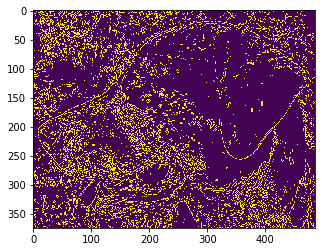

In [5]:
edges = cv2.Canny(image=image_e,threshold1=127, threshold2=127)
plt.imshow(edges)

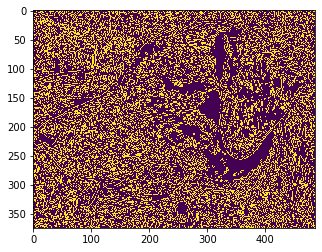

In [7]:
med_val = np.median(image_e)
lower = int(max(0,.07*med_val))
upper = int(min(255,1.3*med_val))
edges= cv2.Canny(image=image_e,threshold1=lower,threshold2=upper)
plt.imshow(edges)

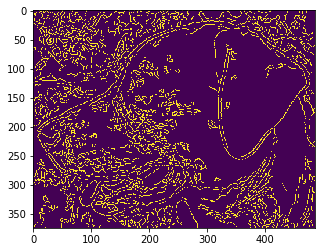

In [9]:
blurred_img = cv2.blur(image_e,ksize=(5,5))
edges= cv2.Canny(image=blurred_img,threshold1=lower,threshold2=upper)
plt.imshow(edges)

grid detection

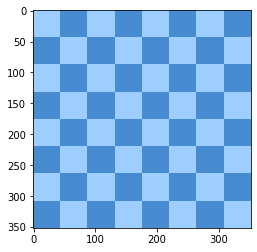

In [12]:
image_g = cv2.imread('../DATA/flat_chessboard.png')
plt.imshow(image_g)

pattern found


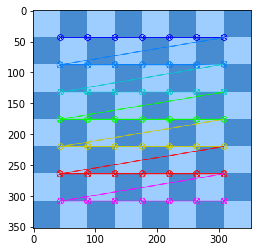

In [13]:
found,corner = cv2.findChessboardCorners(image_g,(7,7))
if found:
    print('pattern found')
else:
    print('pattern not found')
cv2.drawChessboardCorners(image_g,(7,7),corner,found)
plt.imshow(image_g)

contour detection

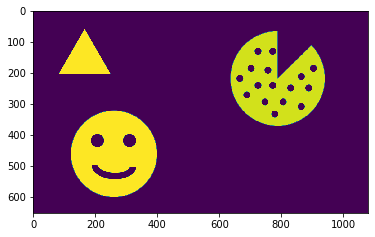

In [20]:
img = cv2.imread('../DATA/internal_external.png',0)
plt.imshow(img)

In [21]:
contours,hierarchy=cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

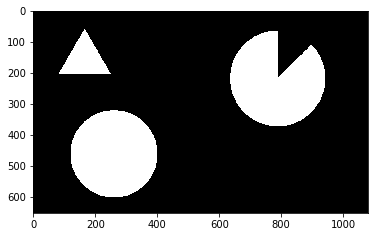

In [25]:
external_contours = np.zeros(img.shape)
for i in range(len(contours)):
    if hierarchy[0][i][3]== -1:
        cv2.drawContours(external_contours,contours,i,255,-1)
plt.imshow(external_contours,cmap='gray')

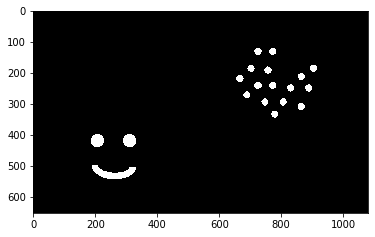

In [26]:
internal_contours = np.zeros(img.shape)
for i in range(len(contours)):
    if hierarchy[0][i][3]!= -1:
        cv2.drawContours(internal_contours,contours,i,255,-1)
plt.imshow(internal_contours,cmap='gray')